In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import seaborn as sns
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train'
test_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test'

In [3]:
train_data = image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    batch_size=32,
    subset='training',
    validation_split=0.2,
)

test_data = image_dataset_from_directory(
    test_path,
    shuffle=True,
    batch_size=32,
)


val_data = image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    batch_size=32,
    subset='validation',
    color_mode='rgb',
    validation_split=0.2
)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Found 20000 files belonging to 2 classes.
Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


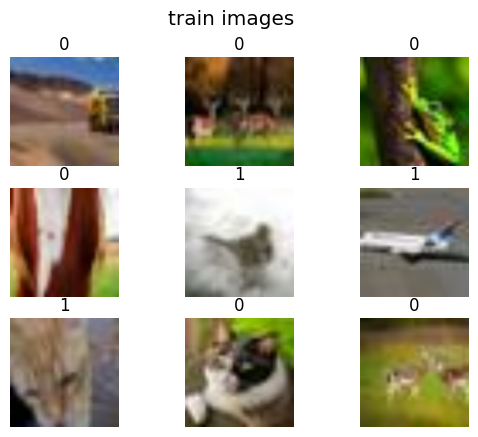

In [4]:
plt.suptitle("train images", fontsize="x-large")
for img, lbl in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')
        plt.title(int(lbl[i]))
        plt.imshow(np.array(img[i]).astype('uint8'));

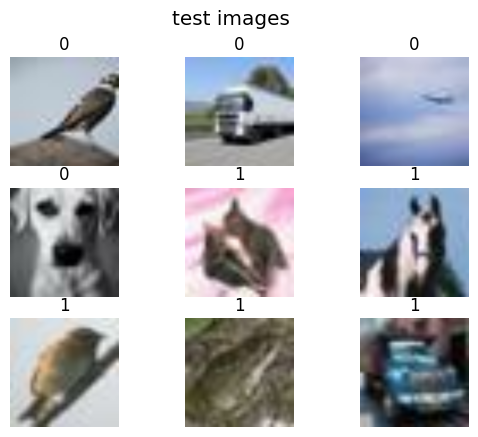

In [5]:
plt.suptitle("test images", fontsize="x-large")
for img, lbl in test_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')
        plt.title(int(lbl[i]))
        plt.imshow(np.array(img[i]).astype('uint8'));

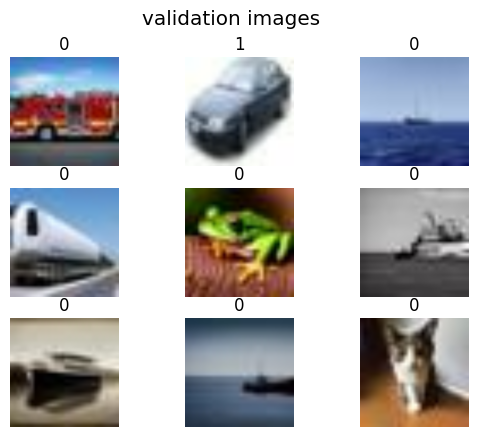

In [6]:
plt.suptitle("validation images", fontsize="x-large")
for img, lbl in val_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')
        plt.title(int(lbl[i]))
        plt.imshow(np.array(img[i]).astype('uint8'));

In [7]:
unique, counts = np.unique(train_data, return_counts=True)

In [8]:
counts

array([1])

In [9]:
labels_array = []
for _, labels in train_data.as_numpy_iterator(): 
    for lbl in labels:
        labels_array.append(lbl)
print(len(labels_array))

80000


In [10]:
labels_array = np.array(labels_array)

In [11]:
labels_df = pd.DataFrame({'labels': labels_array})
labels_df.head()

,labels
0,0
1,0
2,1
3,0
4,1


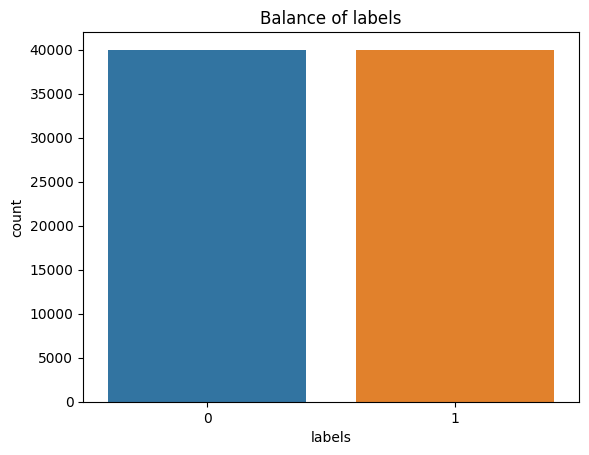

In [12]:
plt.title('Balance of labels')
sns.countplot(data=labels_df, x='labels');

# Model

In [13]:
for img, _ in train_data.as_numpy_iterator(): 
    img_shape = img[0].shape
    break

In [14]:
layers_ = []
layers_.append(layers.Rescaling(1./255)) # Normalise pixel values
layers_.append(layers.Conv2D(32, 3, activation='relu'))
layers_.append(layers.MaxPooling2D())
layers_.append(layers.Flatten())


layers_.append(layers.Dense(64, activation='relu'))
layers_.append(layers.Dense(1, activation='sigmoid'))


model = tf.keras.Sequential(layers_)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


model.build(input_shape=(None, 256, 256, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 64)                33032256  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

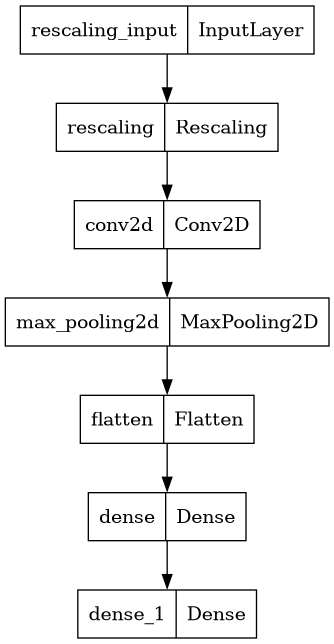

In [15]:
tf.keras.utils.plot_model(model)

In [16]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=10,
  verbose=2
)

Epoch 1/10
2500/2500 - 143s - loss: 0.4991 - accuracy: 0.8002 - precision: 0.7966 - recall: 0.8063 - val_loss: 0.3755 - val_accuracy: 0.8250 - val_precision: 0.8011 - val_recall: 0.8645 - 143s/epoch - 57ms/step
Epoch 2/10
2500/2500 - 111s - loss: 0.3481 - accuracy: 0.8488 - precision: 0.8437 - recall: 0.8564 - val_loss: 0.3385 - val_accuracy: 0.8554 - val_precision: 0.8733 - val_recall: 0.8314 - 111s/epoch - 44ms/step
Epoch 3/10
2500/2500 - 98s - loss: 0.3164 - accuracy: 0.8646 - precision: 0.8591 - recall: 0.8724 - val_loss: 0.3397 - val_accuracy: 0.8531 - val_precision: 0.8589 - val_recall: 0.8448 - 98s/epoch - 39ms/step
Epoch 4/10
2500/2500 - 98s - loss: 0.2876 - accuracy: 0.8778 - precision: 0.8722 - recall: 0.8852 - val_loss: 0.3432 - val_accuracy: 0.8486 - val_precision: 0.8418 - val_recall: 0.8582 - 98s/epoch - 39ms/step
Epoch 5/10
2500/2500 - 101s - loss: 0.2627 - accuracy: 0.8904 - precision: 0.8859 - recall: 0.8964 - val_loss: 0.3372 - val_accuracy: 0.8602 - val_precision: 0.